n = 10000
środek [x̄, ȳ] = [1.00130733 2.00033545]
PC1 = [0.80751036 0.58985339]
PC2 = [ 0.58985339 -0.80751036]
kąt θ [deg] = 36.14660477595274
var ratio PC1, PC2 = [0.94185695 0.05814305]


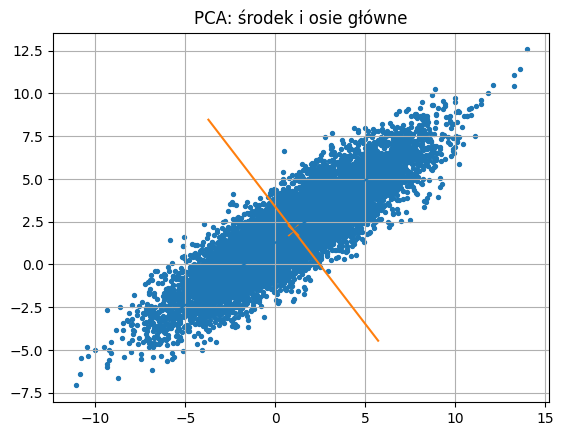

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

PATH = "2.csv"

with open(PATH, "r", encoding="utf-8") as f:
    lines = [ln.strip() for ln in f.readlines() if ln.strip()]

x = np.array([float(v) for v in lines[0].split(",") if v != ""], dtype=float)
y = np.array([float(v) for v in lines[1].split(",") if v != ""], dtype=float)

X = np.column_stack([x, y])          
n = X.shape[0]

mu = X.mean(axis=0)                 
B = X - mu                     


C = (B.T @ B) / (n - 1)

eigvals, eigvecs = np.linalg.eigh(C)           
idx = np.argsort(eigvals)[::-1]                 
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

pc1 = eigvecs[:, 0]
pc2 = eigvecs[:, 1]

if pc1[0] < 0: pc1 = -pc1
if pc2[0] < 0: pc2 = -pc2

theta = math.degrees(math.atan2(pc1[1], pc1[0]))

print("n =", n)
print("środek [x̄, ȳ] =", mu)
print("PC1 =", pc1)
print("PC2 =", pc2)
print("kąt θ [deg] =", theta)


ratio = eigvals / eigvals.sum()
print("var ratio PC1, PC2 =", ratio)

# wykres: punkty + osie
plt.figure()
plt.scatter(X[:,0], X[:,1], s=8)
plt.scatter(mu[0], mu[1], s=60, marker="x")

L = 8 
p1a, p1b = mu - L*pc1, mu + L*pc1
p2a, p2b = mu - L*pc2, mu + L*pc2
plt.plot([p1a[0], p1b[0]], [p1a[1], p1b[1]])
plt.plot([p2a[0], p2b[0]], [p2a[1], p2b[1]])

plt.title("PCA: środek i osie główne")
plt.grid(True)
plt.show()
